### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2018 ###

# Building Megapolis #

#### Sam Berglin(berglin@wisc.edu), Aiden Song (aiden@cs.wisc.edu), Rachel Sowada(rsowada@wisc.edu), and Andrew Eng(ateng@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [First Model without Layout Mapping](#2.A.-First-Model-Without-Layout-Mapping)
    2. [Second Model with Layout Mapping:Zoning](#2.B.-Second-Model-With-Layout-Mapping:-Zoning)
    3. [Third Model with Layout Mapping and Year Iteration](#2.C.-Third-Model-With-Layout-Mapping-and-Year-Iteration)
1. [Solution](#3.-Solution)
    1. [First Model without Layout Mapping](#3.A.-First-Model-Without-Layout-Mapping)
    2. [Second Model with Layout Mapping:Zoning](#3.B.-Second-Model-With-Layout-Mapping:-Zoning)
    3. [Third Model with Layout Mapping and Year Iteration](#3.C.-Third-Model-With-Layout-Mapping-and-Year-Iteration)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [How many buildings to build for the city?](#4.A-How-many-buildings-to-build-for-the-city?)
  2. [What is the city like with Zoning?](#4.B-What-is-the-city-like-with-zoning?)
  3. [How many buildings to build for the city?](#4.C-What-is-the-city-like-with-zoning-and-year-iterations?)
      1. [First Year Iteration](#4.C.1.-First-Year-Iterations)
      2. [Second Year Iteration](#4.C.2-Second-Year-Iteration )
      3. [Third Year Iteration](#4.C.3-Third-Year-Iteration)
1. [Conclusion](#5.-Conclusion)
    1. [What's Next](#5.A.-What's-Next?)

---
## 1. Introduction ##

City planning is the planning and designing of a city so that it can best control and facilitate economic growth, technological developments, and a sustainable population. Various aspects of city planning include the zoning of land for specific use only, regulating how space is used, what buildings can go on specific plots of land, how many fire and police stations within each block, etc.

In 2016, Y combinator, one of the biggest tech startup incubator in the world and have helped launch companies like Dropbox and Airbnb, announced their project of building the "New Cities" project that intended to build a completely new city from scratch.[1] Building a new city from the ground up is not a radically new idea. In 2015, the Egyptian housing minister Mostafa Madbouly announced that they will begin building a new city that is located 45 killometers east of Cairo and outside of the Second Greater Cairo Ring Road.[2] In addition, games such as the SimCity series are primarily based on the concept of urban development and city planning. Whilst not realistic, these games provide a “sandbox” that allows players to create a magic city.

Creating these magical cities may seem like a simple task, however, when it comes to optimizing the most economically productive or most attractive city, there are many variables to consider. Land, tax rates, budgets, policies, and types of buildings are just a few that must be considered when planning out the “best” metropolis to build. 

For the most part, we will not be taking into account all of these concerns. Our project will instead be focusing on optimizing simplified magic cities before we try to tackle or discuss future additions or problems for more realistic models.

For now, however, there are ways we can model a simplified city and project its economic output or attractiveness for people to come and live in it. We can do this starting with the current plot of land or city. From there, we can evaluate its budget based on current economic output and population, and after putting a number to the year’s budget, then we can calculate the value each type of building will bring us. 

![](https://www.watg.com/wp-content/uploads/2017/08/King-Abdullah-Economic-City-1920x999.jpg "Picture of the city")

**Sources:**
1. Rhodes, M. (2017, June 03). Y Combinator's Plan to Build a New City? Not Actually Crazy. Retrieved from https://www.wired.com/2016/07/y-combinators-plan-build-new-city-not-actually-crazy/
2. Proposed new capital of Egypt. (2018, April 11). Retrieved from https://en.wikipedia.org/wiki/Proposed_new_capital_of_Egypt

# 2. Mathematical model #

## 2.A. First Model Without Layout Mapping##

We begin our problem by looking at the city's intended population ($p$), land developing area, and its budget (B). We also generate some data for possible different buildings that can be constructed in this new city. In this simple example, we only taking into considerations some of the absolute essential parts that are needed for a city, for example, homes, schools,fire station, etc.

We are first interested in knowing given the resources that we are given, how many different buildings can we built?We model our problem as a **Mixed Integer Program** to solve.
<br/>

<center>
$\begin{equation*}
\begin{aligned}
& \underset{x}{\text{maximize}}
& & x^T(P + A) \\
& \text{subject to}
& & x \geq p \cdot X_{min} \\
&&& B \geq x^TC \\
&&& x_i \in \mathbb{Z} \quad \forall x_i \in x \\
\end{aligned}
\end{equation*}$
</center>
<br/>
  
  In our model, $x = (x_1, x_2, ..., x_t)$ represents a vector of the number of each of the t types of buildings possible. Clearly, each of these values are integers.  
  
  $P, A, \text{and } C$ also represent similar quanitities, where $P = (p_1, p_2, ... p_n)$ and similar for $A$ and $C$. They are also t-dimensional vectors with the ith entry corresponding to the ith type of building. For a given building type i, $c_i$ represents the cost of constructing a building, $p_i$ represents the annual profit, and $a_i$ represents the attractiveness. In our simple model, we measure each of these for a building on a scale from -10 to 10. Negative numbers represent cost rather than profit, and "ugliness" rather than attractiveness (note: there cannot be a negative cost for constructing a building). B and p are simply numbers (B a real number, p an integer). 
  
  $X_{\text{min}}$ represents the minimum per person requirements for each building. Like $x$, it is t-dimensional for each of the minimum requirements for the t buildings. For clarity, we represent $X_{\text{min}}$ in number of buildings per 1,000 people. Furthermore, $p$ represents the number of people or population the city must be able to support.
  
  Since our decision variables (the number of buildings) must be positive integers, the problem is a MIP. In our model, we essentially are trying the maximize the annual "value" of a city given a certain budget for **completely** constructing it. Also, we are not placing any buildings at all. This simply describes how many of each to use.
  
  ---

# 2.B. Second Model With Layout Mapping: Zoning  
  
  Obviously, choosing how many buildings to build is not the entirety of how buildings are planned in a city. We must choose where to place them, while still maintaining Level I's constraints. In most of the city planning problem, we have to take into considerations different zoning like housing neighborhoods, agriculture, manufacturing factories, etc.
  
  Consider the possible "world" to be an nxn board called $W$. Assume there are $K$ classes (types) of buildings. $w_{i,j,k} \in W$ corresponds to whether or not (represented in binary with 0 or 1) building of class $k$ built at location $[i,j]$ of the world. Clearly, there should be constraints that $1\leq i \leq n$, $1\leq j \leq n$, and $1\leq k\leq K$. This renders our decision variables to be a 3 dimensional matrix. We denote the one-hot encoded vector at $i,j$ as $w_{i,j,:}$ (with the colon notation : represents all the elements in that dimension). We still have a similar $P$ and $A$ vectors. We represent our problem as below. We will more specifically explain the purpose of each constraint and notation afterwards.
  
<br/>
**Mathematical Model**

<center>
$\begin{equation*}
\begin{aligned}
& \underset{w_{i,j,k} \in W}{\text{maximize}}
& & \sum_{w_{i,j,k} \in W} w_{i,j,k}(P_k + A_k) \\
& \text{subject to}
& &  w_{i,j,k} = b_{i,j,k} \quad \textrm{and} \quad \forall b_{i,j,k} \in W_\text{base} \subset W \quad\ (A)\\
&&& \sum_{w_{i,j,k} \in W} w_{i,j,k} \geq X_\text{min} \cdot p   \quad(B)\\
&&& \sum_{w_{i,j,k} \in W} w_{i,j,k}C_t \leq \beta \quad (C)\\
&&& \sum_{1 = k}^{K} w_{i,j,k} \leq 1 \quad \forall w_{i,j,k} \in W \quad (D)\\
&&& w_{i,j,k} \leq w_{i-1,j,k} + w_{i,j-1,k} + w_{i+1,j,k} + w_{i,j+1,k} \quad \textrm{and} \quad \forall w_{i,j,k} \in W_\text{inner} \quad (E)\\
&&& \sum_{w_{i,j,k} \in W} (4w_{i,j,k} - w_{i-1,j,k} - w_{i+1,j,k} - w_{i,j+1,k} - w_{i,j-1,k}) \leq R \sum_{w_{i,j,k} \in W} w_{i,j,k} \quad \textrm{and} \quad 1\leq t \leq T \quad (F)\\
&&& w_{i,j,k} \in \{0,1\} \quad(G)\\
\end{aligned}
\end{equation*}$
</center>
<br/>
<br/>
**Explanations**

  Constraint (A): This constraint ensures that the base city exists in the middle of the map and that the outside (or border) of the world is empty. The base city exists so that the next iteration can grow from it, and the border being empty aids in perimeter calculation in constraint F. $W_\text{base}$ is a subset of the world $W$ that specifies these constraints, and $b_{i,j,k}$ are the values that the base city takes for each value in $W_\text{base}$.
  
  Constraint (B): This constraint ensures that the population is suported by the proper number of buildings. It is similar to the toy example.
  
  Constraint (C): This constraint ensures that the budget $\beta$ is respected. This is similiar to the constraint enforced in the first part of the project
  
  Constraint (D): This constraint ensures that each vector $w_{i,j,:}$ can have at most one 1 in one position of the vector and 0 everywhere else. This ensures that there is only one class of building assigned to each square of the world (the method known as one-hot encoding).
  
  Constraint (E): This is a nontrivial constraint as it creates a phenomenon of zoning. Zoning is where certain areas of a community are reserved for certain types of buildings. For example, there can be residential zones or business zones. In order to implement this into our example, we ensure that types of buildings must form **continguous** areas. This is represented in the constraint by not letting type $t$ of a building be built **unless** there is one of type $k$ surrounding it. Note that this does not prevent multiple zones of the same type; rather it just ensures that buildings are present in only in 'groups' which can be thought of as zones. $W_\text{inner}$ represents the inner world (i.e. the world without the border). We only sum over these squares since the border is defined to be zero.
  
  Constraint (F): This constraint builds upon constraint (E). As a whole, it prevents regions from being strangley shaped by ensuring a proper ratio of perimeter to area. The expression on the left calculates the perimeter of each of the contiguous building regions for a given building type k. The right side's summation calculates the area of the continguous building regions for a given type k. The corresponding ratio is represented by $R$. The proper value of R is not immediately obvious, so it was experimentally determined during development. The calculation for perimenter is nontrivial and we discuss this more below.
  
  Constraint (G) Ensures that each value of the matrix is a binary, which makes this program a Mixed Integer Linear Program.
  
**Perimeter Calculation Explanation**

Here we discuss the details of the perimeter calculation $\sum_{w_{i,j,k} \in W} (4w_{i,j,k} - w_{i-1,j,k} - w_{i+1,j,k} - w_{i,j+1,k} - w_{i,j-1,k})$, where type $k$ is a given constant.
    
The formula is easier to understand if rearranged as $\sum_{w_{i,j,k} \in W} ((w_{i,j,k} - w_{i-1,j,k}) + (w_{i,j,k}-w_{i+1,j,k}) + (w_{i,j,k}-w_{i,j+1,k}) + (w_{i,j,k}-w_{i,j-1,k}))$.
Here, we are taking the sum of the differences between $w_{i,j,k}$ and each one of its adjacent sides, for a given class k. This way, buildings that are adjecent to other buildings of the same type will have a difference of zero. Furthermore, when the adjacent buildings are of different types, the difference will be 1 (1 - 0, with the 1 coming from the base building and the 0 from the bordering building of a different or no type). This way, for every square, the number of bordering squares of the same type are calculated. Thus, this calculates a perimeter for each type of building.

---

## 2.C. Third Model With Layout Mapping and Year Iteration

Unfortunately, most cities (except Rome!) are not built in a day. It often takes years of planning in order to intelligently grow a city. We can model this by expanding our model over the course of several iterations. To simulate intelligent planning, we can choose to maximize the value of the final city while ensuring that each city expands from the previous iteration. This must be done while respecting budgetary and population support constraints each year. Furthermore, we have the population grow as a function of attractiveness and budget be a function of profits.
   
   Additionally, we make the hospital placement more realistic. An important contributor to a hospital's value is its location. Hospitals are meant to serve regions of cities. Therefore, we can ensure that each building has a hospital reasonably close.
   
   Let $K$ be the total number of classes of buildings, and $T$ be the length in years of our plan. Let $W$ be the same $N\times N$ board. However, since we have more than one year, each element of $W$ is $w_{i,j,k,t}$, where $i,j,\text{and }k$ are all the same as in Level 2 but $t$ is an index for time ($1\leq t\leq T$). We use $w_{a,b,:,c}$ to denote the vector of $w_{i,j,k,t}$ where $i=a, j=b, t=c$. Note that the $:$ can be used for any dimension of $W$. We formulate our problem as follows.
<br/>
<br/>
**Mathematical Model**:  
 
<center>
$\begin{equation*}
\begin{aligned}
& \underset{w_{i,j,k,t} \in W; \space \beta; \space \Pi}{\text{maximize}}
& & \sum_{w_{i,j,k} \in W} w_{i,j,k,t}(P_k + A_k) \\
& \text{subject to}
& & w_{i,j,k,t} \in \{0,1\} \quad \forall w_{i,j,k,t} \in W \quad (A) \\
&&& \sum_{\mu=1}^{K} w_{i,j,\mu,t} \leq 1 \quad \forall w_{i,j,:,t} \quad (B) \\
&&& w_{i,j,k,t} \leq w_{i-1,j,k,t} + w_{i,j-1,k,t} + w_{i+1,j,k,t} + w_{i,j+1,k,t} \quad \forall w_{i,j,k,t} \in W_\text{inner} \quad (C) \\
&&& \sum_{w_{:,:,k,t}} 4w_{i,j,k,t} - w_{i-1,j,k,t} - w_{i,j-1,k,t} - w_{i+1,j,k,t} - w_{i,j+1,k,t} \leq R \cdot \sum_{w_{i,j,k,t}} w_{i,j,k,t} \quad \forall w_{:,:,k,t} \in W_\text{inner} \quad (D) \\
&&& \beta_1 = \beta^\prime \quad (E) \\
&&& \beta_2 = \beta_{1} - \sum_{w_{i,j,k,t}} (w_{i,j,k,t}-b_{i,j,k}) \cdot C_k + 0.2 \cdot \sum_{w_{i,j,k,1}} w_{i,j,k,t} \cdot P_k \quad (F) \\
&&& \beta_t = \beta_{t-1} - \sum_{w_{i,j,k,t}} (w_{i,j,k,t-1}-w_{i,j,k,t-2}) \cdot C_k + 0.2\cdot \sum_{w_{i,j,k,t}} w_{i,j,k,t} \cdot P_k \quad \forall \beta_t: 3\leq t \leq T\quad (G) \\
&&& \sum_{w_{i,j,k,t} \in W} (w_{i,j,k,t} - w_{i,j,k,t-1}) \cdot C_k \leq \beta_t \quad \forall \beta_t \in \beta \quad (H) \\
&&& \sum_{w_{i,j,k,t}} (w_{i,j,k,1} - b_{i,j,k}) \cdot C_k \leq \beta_1 \quad (I) \\
&&& \sum_{w_{i,j,t}} w_{i,j,k,t} \geq X_{min}[k] \cdot \Pi_t \quad \forall \Pi_t, 1\leq k \leq K \quad (J) \\
&&& \Pi_1 = \Pi^\prime \quad (L) \\
&&& \Pi_t = \Pi_{t-1} + Q\cdot \sum_{w_{i,j,k,t-1}} 1\cdot A_k \quad 2 \leq t \leq T \quad (M) \\
&&& w_{i,j,k,t} \geq w_{i,j,k,t-1} \quad \forall w_{i,j,k,t}:2\leq t \leq T \quad (N) \\
&&& \sum_{a = i-c; \space b = j-c}^{i+c;\space j+c} w_{a,b,h,t} \geq \sum_{k=1}^{K} w_{i,j,k,t} \quad \forall w_{i,j,h,t} \in W_\text{cover} \quad (O) \\
&&& w_{i,j,k,t} = b_{i,j,k} \in W_\text{base}, 1\leq t \leq T \quad (P) \\
\end{aligned}
\end{equation*}$
</center>
<br/>
<br/>
**Explanations: **
The decision variables are similar as in Level 2, with the addition of $\beta$ and $\Pi$. $\beta$ and $\Pi$ are T-dimensional vectors that represent annual budgeting and population growth.
   
   (A) Similar to Level 2, this constraint ensures that each of the decision variables in $W$ are binary.
   
   (B) This ensures that there is only 1 type of building per spot, as in Level 2. The **:** is used to represent all of the entries for given $i,j,$ and $t$.
   
   (C) This is the same continuity constraint as in Level 2, except enforced for each year.
   
   (D) Once again, this is the perimeter:area ratio that must be observed every year.
   
   (E) $\beta^\prime$ denotes the "base" budget. This must be respected in the first year.
   
   (F&G) These constraints define the budget overflow from year to year. Every year, that year's budget is the leftover from last years budget plus a percentage of the profit from that year. Last year's leftover budget is calculated by adding the costs of the new buildings. Constraint (F) is needed since year 2 still depends on the base city.
   
   (H&I) This limits the buildings built every year to respect the yearly budget. Note that these are only the new buildings, not the city as a whole. Note that (I) is specially included since it also depends on the base city.
   
   (J) The city must support the population in each year. Where $\text X_{min}$ is still the vector with the minimum number of buildings required for a given unit of population. 
   
   (L) The initial population must be specified.
   
   (M) This constraint describes the annual population growth. It adds the prior year's population to the new residents who come due to the attractiveness of the previous iteration of the city. Q is simply a constant that determines the ratio between attractiveness and the amount of new people.
   
   (N) Preserves each iteration's structure in the next iterations. By making each value be larger or equal to the prior year, buildings being built at a given location will ensure that they remain in each subsequent iteration.
   
   (O) This is the hospital covering constraint. We chose to represent it as a linear constraint and not as a set covering problem since a set covering problem would require calculation of distances between each pair of points. Unfortunately, our constraint represents the covered region by a hospital as a square and not a circle. c is an integer which is the size of the "square" that a hospital covers. This constraint ensures there is a hospital present within c squares (can go diagonal). $W_{cover}$ is different than $W_{inner}$. $W_{cover}$ is the "core" of the city which ignores a border of c units. This is for ease of constraint writing. However, it is realistic since only the central part of a city is always served by a nearby hospital.
   
   (P) This ensures the base city exists, similar to Level 2. Note that in our solution, we include an empty border as part of our base city. It also must exist in every iteration.

---
## 3. Solution ##
** Notes:**
- We use Julia JuMP and solver Gurobi for most of the optimization problem in this model
- In addition to that, we use Plots.jl for most of the graphing part of this project
- We did not use any of the real world data becase we want to work with smaller datasets, but the model should not be that much difference with real world data. But with the time constraints that we have, we could not find any real world data that are easy to work with so we just went with some data that are based on real world settings.
- If rendering the next block caused any warning or error, please install / reinstall the latest version of [Plots.jl](http://docs.juliaplots.org/latest/install/), and [Gurobi](http://www.gurobi.com/documentation/)

In [1]:
# We will first load all the packages and render all the helper functions 
using JuMP,Gurobi
using Plots,Images

In [2]:
# Load the Data
buildings = ["business", "hospital", "park", "farm", "school", "home"]
numType = size(buildings,1)
cost = [3,25,10,5,10,1]             # Profits, cost, and attractiveness on scale
profits = [9, 3,-1,6,-4,1]          # from -10 to 10, with 10 being the most profitable
attractiveness = [2,-2,3,-1,5,2]    # attrativeness of each building type based on how much people would like it if it's place near it
minBuildings = [1,0.1,0,1,0.5,1]    # Minimum number of 'buildings' per 1k people
closeBuildings = [1,2,3,4,5,6];     # buildings that should be closed together
;

In [3]:
# THIS CELL BLOCKS CONTAIN ALL THE GRAPHING FUNCTIONS
#= 
    This function converts 2 x coordinates into a vector of points for the below graph function to use.
    Arguments:
    1. x1: the first x coordinate point
    2. x2: the second x coordinate point
=#
function xCoordinates(x1,x2)
    [x1;x2;x2;x1;x1;NaN]
end


#=
    This function converts 2 y coordinates into a vector of points for the below graph function to use.
    Arguments:
    1. y1: the first y coordinate point
    2. y2: the second y coordinate point
=#
function yCoordinates(y1,y2)
    [y1;y1;y2;y2;y1;NaN]
end

#=
    This function uses Plots.jl to graph out the buiilding layout of the city

    arguments
    1. resultMatrix: the matrix of each of the building, all of them should be an integer values
    2. building_types: different kinds of buildings (a string vector)
    3. area: the area of each of the building (Optional). It automatically make every area 1 if there is no data passed in
    4. graphTitle: the title that want to assign to a graph
=#
function graphMap(resultMatrix,building_types,graphTitle,area=[])
    
    hosp = load("./hospital.jpg"); park = load("./park.jpg"); farm = load("./farm.jpg");
    home = load("./house.jpeg"); biz = load("./biz.jpg"); school = load("./school.jpg");
    pictures = Dict("hospital" => hosp, "park" => park, "home" => home, "farm" => farm, 
                    "business"=>biz, "school" => school)
    num_types = size(building_types,1);
    if length(area) == 0 area = ones(num_types)' end
    buildings = Dict()
    # we also create another list to map all the value in the result matrix to the name of the building types
    index = [s for s in building_types]
    # loop through the position matrix, figure out the area of each, and then plot
    x_axis = 0; y_axis = 0;
    count = 0;
    building_counts = 0;
    for i = 1:size(resultMatrix,1)
       side_length = 1;
        for j = 1:size(resultMatrix,2)
            bType = resultMatrix[i,j];
            name_building = index[bType]
            # this gives the particular area of the building type
            a = area[bType] 
            side_length = sqrt(a)
            # convert the types to the name of the building
            x1 = x_axis; x2 = x_axis + side_length;
            y1 = y_axis;y2 = y_axis + side_length;
            # first see if the thing we are accessed is empty
            try
                buildings[name_building] 
                catch error
                buildings[name_building] = [xCoordinates(x1,x2) yCoordinates(y1,y2)]
                x_axis = x_axis + side_length + 0.5;
                building_counts += 1;
                continue;
            end
            # if it's not, then we can directly added it
            buildings[name_building] =[
                buildings[name_building]
                [xCoordinates(x1,x2) yCoordinates(y1,y2)]
            ]
            building_counts += 1;
            x_axis = x_axis + side_length + 0.5;
        end
        y_axis = y_axis + side_length+ 0.5 ;
        x_axis = 0
    end 
    xlimit = floor(sqrt(building_counts)) + 7;
    # NOW graph everything
    counter = 0;
    fig = nothing;
    for s in keys(buildings)
        if counter == 0
            fig = plot(buildings[s][:,1], buildings[s][:,2], bg = :black, lw = 6, label = s,
                xlim = (0,xlimit),axis= false,legend = :right,title=graphTitle)
            counter += 1;
        elseif s == "empty"
            plot!(buildings[s][:,1], buildings[s][:,2],color=:black, lw = 3, label =  "")
        else
            plot!(buildings[s][:,1], buildings[s][:,2],lw = 6, label = s)
        end
        size_vec = size(buildings[s],1)
        i = 1
        if s != "empty"
            while i <= size_vec
                plot!([buildings[s][i,1],buildings[s][i+1,1]], 
                        [buildings[s][i,2], buildings[s][i+2,2]],
                        pictures[s],yflip = false)
                    i += 6;
            end  
        end
    end
    return fig
end


#=
    This function converts the 3D matrix into a 2D matrix with number corresponding to 
    different building types. 
    Arguments:
    1. map: it takes in a 3d matrix as a "map"
    2. graphTitle: the display of the title of the graph
=#
function getGraphMatrix(map,graphTitle)
    N = size(map,1); M = size(map,2); P = size(map,3)
    newMap = fill(0,(M,N))
    for i = 1:N
        for j = 1:M
            for k = 1:P
                if map[i,j,k] == 1
                    newMap[i,j] = k
                    break;
                end
            end
            if sum(map[i,j,k] for k = 1:P) == 0
                newMap[i,j] = 7
            end
        end
    end
    building_construct= ["business", "hospital", "park", "farm", "school", "home","empty"]
    graphMap(newMap,building_construct,graphTitle)
end

#=
    This function is used to graph a pie chart of how many buildings to build.
    Arguments:
    1. buildings: name of each building
    2. num_build: for each type of the building, how many of each to build
    3. t: title of the pie chart.
=#
function PiePlot(buildings, num_build, t)
    plot(buildings, num_build,title = t ,seriestype=:pie)
end

PiePlot (generic function with 1 method)

## 3.A. First Model Without Layout Mapping

In [4]:
#=
    Part 1, this function finds the optimal number of buildings for each of the building type in this new city 

    arguments:
    - population: intended population for the new city, should be a real number (in hundred thousands)
    - budgets: the total amount of money to build the new city, should be a real number
    - min_num_bui: minimum number of buildings for each building types per 100k people, should be a vector
    - cost: the cost of each building types, should be a vector
    - profits: profits for each building types, should be a vector
    - attractivenss: attrativeness of each of the building type, should be a vector.
=#
function findNumBuildings(population, budget, min_num_bui, cost, profit, attr)
        
    m = Model(solver = GurobiSolver(OutputFlag= 0))
    
    types_build = size(profit,1)
    @variable(m, buildings[1:types_build],Int)
    # this ensures that the there are at least certain amount of each building type per 100k people
    @constraint(m,var[i = 1:types_build], buildings[i] >= min_num_bui[i] * population)
    # this ensures that we don't go overbudgets.
    @constraint(m, sum(cost .* buildings) <= budget)
    # we want to maximize profits and attractiveness of all the buildings.
    @objective(m, Max, buildings'*(profit + attr))
    s = solve(m)
    return getvalue(buildings)
end

findNumBuildings (generic function with 1 method)

## 3.B. Second Model With Layout Mapping: Zoning

In [5]:
#=
    In this model, we build on top of the first part and added in the constraint to have different zones
    Argument:
    1. title: the title that you want to be displayed on the graph
=#

function layoutMapping(title)
    
    N = 10
    numType = size(buildings,1)
    separatedBuildings = []; 
    numType = size(buildings,1)
    
    # assume that we have population of 1,000 people
    population = 1
    # assume that we have a budget of
    budgets = 100
    R = 40    

    # Base city
    baseCity = zeros(N,N,length(buildings))
    center = Int(floor(N/2))  # 'Center' of board. Base will be built around this
    baseCity[center,center,:] = [0 1 0 0 0 0]
    baseCity[center,center+1,:] = [1 0 0 0 0 0]
    baseCity[center+1,center+1,:] = [0 0 0 0 0 1]
    baseCity[center-1,center,:] = [0 0 1 0 0 0]
    baseCity[center,center-1,:] = [0 0 0 0 1 0]
    baseCity[1,:,:] = zeros(N,length(buildings))   # Border is zero's
    baseCity[N,:,:] = zeros(N,length(buildings))
    baseCity[:,1,:] = zeros(N,length(buildings))
    baseCity[:,N,:] = zeros(N,length(buildings))

    m = Model(solver = GurobiSolver(OutputFlag = 0))
    @variable(m, x[1:N, 1:N, 1:numType], Bin)

    # can't have more than one building in a spot (D)
    @constraint(m, single[i in 1:N, j in 1:N], sum(x[i,j,:]) <= 1)

    # buildings in the base must stay and the Calculation Border must be empty 
    @constraint(m, flow[i in 1:N, j in 1:N, k in 1:numType], x[i,j,k] >= baseCity[i,j,k])
    @constraint(m, topSideZero, x[1,:,:] .== baseCity[1,:,:])
    @constraint(m, leftSideZero, x[:,1,:] .== baseCity[:,1,:])
    @constraint(m, bottomSideZero, x[N,:,:] .== baseCity[N,:,:])
    @constraint(m, rightSideZero, x[:,N,:] .== baseCity[:,N,:])
    @constraint(m, x[2,:,:] .== baseCity[2,:,:])
    @constraint(m, x[:,2,:] .== baseCity[:,2,:])
    @constraint(m, x[N-1,:,:] .== baseCity[N-1,:,:])
    @constraint(m, x[:,N-1,:] .== baseCity[:,N-1,:])

    # meet the minimum number per building (B)
    @constraint(m, support[i in 1:numType], sum(x[:,:,i]) >= minBuildings[i]*population)

    # Stay within the given budget (C)
    @constraint(m, sum((sum(x[:,:,k]) - sum(baseCity[:,:,k]))*cost[k] for k in 1:numType) <= budgets)

    # Continuity Constraint (E)
    @constraint(m, continuous[i in 2:N-1, j in 2:N-1, k in closeBuildings], x[i,j,k] <=
        x[i-1,j,k] + x[i,j-1,k] + x[i+1,j,k] + x[i,j+1,k])

    # Area:Perimeter Constraint (F)
    @constraint(m, ratio[t in closeBuildings],
        sum( sum( 4x[i,j,t] - x[i-1,j,t] - x[i,j-1,t] - x[i+1,j,t] - x[i,j+1,t] for j in 2:(N-1)) for i in 2:(N-1))
        <= R * sum( sum( x[i,j,t] for j in 2:N-1) for i in 2:(N-1)))

    # Objective
    @expression(m, totalProfit, sum( sum(x[:,:,k])*profits[k] for k in 1:numType))
    @expression(m, totalAttractiveness, sum(sum(x[:,:,k])*attractiveness[k] for k in 1:numType))
    @objective(m, Max, totalProfit + totalAttractiveness)

    println(solve(m))
    getGraphMatrix(getvalue(x),title)

end

layoutMapping (generic function with 1 method)

## 3.C. Third Model With Layout Mapping and Year Iteration

In [6]:
#=
    In this model, we built on top of the first and second part but added in different year iterations
    Arguments:
    1. iteration: different year iterations (range: 1-3)
    2. graphTitle: title of the graph
=#
function LayoutMappingAndYearIteration(iteration,graphTitle)
    # we want to limit the iterations to be 1-3, as more iterations usually take too long to compute.
    if iteration != 1 && iteration != 2 && iteration != 3 
        return; 
    end
    N = 8   # Dimension of "world"
    hospIndex = 2
    # Base city
    baseCity = zeros(N,N,length(buildings))
    center = Int(floor(N/2))  # 'Center' of board. Base will be built around this
    baseCity[center,center,:] = [0 1 0 0 0 0]
    baseCity[center,center+1,:] = [1 0 0 0 0 0]
    baseCity[center+1,center+1,:] = [0 0 0 0 0 1]
    baseCity[center-1,center,:] = [0 0 1 0 0 0]
    baseCity[center,center-1,:] = [0 0 0 0 1 0]
    baseCity[1,:,:] = zeros(N,length(buildings))   # Border is zero's
    baseCity[N,:,:] = zeros(N,length(buildings))
    baseCity[:,1,:] = zeros(N,length(buildings))
    baseCity[:,N,:] = zeros(N,length(buildings))

    population0 = 1      # Initial population of 3k people
    budget0 = 100        # Base budget
    R = 40               # Constant used in perimeter:area ratio
    T = 3                # Timeframe for Number of Years
    Q = 0.1              # Ratio of attractiveness to population growth
    P = 0.2              # Profit percent kept as next years budget
    cover = 2            # Hosptial cover radius


    #### Modeling ####
    m = Model(solver = GurobiSolver(OutputFlag = 0))
    @variable(m, x[1:N, 1:N, 1:numType, 1:T], Bin)
    @variable(m, budget[1:T] >= 0)
    @variable(m, population[1:T] >= 0)

    # Constraints to ensure each 'snapshot' city is valid
    # Can't have more than one building in a spot (D)
    @constraint(m, single[i in 1:N, j in 1:N, t in 1:T], sum(x[i,j,:,t]) <= 1)
    # Continuity Constraint (E)
    @constraint(m, continuous[i in 2:N-1, j in 2:N-1, k in 1:numType, t in 1:T],
        x[i,j,k,t] <= x[i-1,j,k,t] + x[i,j-1,k,t] + x[i+1,j,k,t] + x[i,j+1,k,t])
    # Perimeter:Area Constraint (F)
    @constraint(m, ratio[c in 1:numType, t in 1:T],
        sum( sum( 4x[i,j,c,t] - x[i-1,j,c,t] - x[i,j-1,c,t] - x[i+1,j,c,t] - x[i,j+1,c,t]
            for j in 2:(N-1)) for i in 2:(N-1))
        <= R * sum( sum( x[i,j,c,t] for j in 2:N-1) for i in 2:(N-1)))

    # Budgeting
    # First year budget is predetermined
    @constraint(m, budget[1] == budget0)
    # Second year budget constraint specially specified (since it depends on base city)
    @constraint(m, budget[2] == budget[1] -
            sum((sum(x[:,:,k,1])-sum(baseCity[:,:,k])) * cost[k] for k in 1:numType) +
            P*sum(sum(x[:,:,k,1])*profits[k] for k in 1:numType))
    # Yearly budget depends on overflow of prior year's budget and profits
    @constraint(m, rolloverBudget[t in 3:T],
        budget[t] == budget[t-1] -
            sum((sum(x[:,:,k,t-1])-sum(x[:,:,k,t-2])) * cost[k] for k in 1:numType)+
            P*sum(sum(x[:,:,k,t-1])*profits[k] for k in 1:numType))
    # Stay within the given budget year to year (C)
    @constraint(m, annualBudget[t in 2:T],
        sum((sum(x[:,:,k,t])-sum(x[:,:,k,t-1])) * cost[k] for k in 1:numType) <= budget[t])
    # Special constraint for iteration 1 since it's "prior year" is the base city
    @constraint(m, initBudget,
        sum((sum(x[:,:,k,1])-sum(baseCity[:,:,k])) * cost[k] for k in 1:numType) <= budget[1])

    # Population Support
    # Ensuring the population is supported each year
    @constraint(m, support[i in 1:numType, t in 1:T],
        sum(x[:,:,i,t]) >= minBuildings[i]*population[t])
    # Population depends on attractiveness of city
    @constraint(m, population[1] == population0)    # Initial population
    @constraint(m, growth[t in 2:T], population[t] == population[t-1] +
        Q*sum( sum(x[:,:,k,t-1])*attractiveness[k] for k in 1:numType))

    # Ensuring each iterations structure is preserved in the next iteration
    # Speical constraint for 1st iteration since it depends on the base city
    # Preserving city structure in subsequent iterations
    @constraint(m, presStr[i in 1:N, j in 1:N, k in 1:numType, t in 2:T],
        x[i,j,k,t] >= x[i,j,k,t-1])

    # Hospital Covering
    @constraint(m, hospCover[i in (1+cover):(N-cover), j in (1+cover):(N-cover), t in 1:T],
        sum(sum( x[a,b,hospIndex,t] for a in (i-cover):(i+cover)) for b in (j-cover):(j+cover)) >=
        sum(x[i,j,:,t]))

    # General City Requirements
    # Base city must always exist
    @constraint(m, firstIter[i in 1:N, j in 1:N, k in 1:numType],
        x[i,j,k,1] >= baseCity[i,j,k,1])
    # Ensures border is always empty (facilitates perimeter calculations)
    @constraint(m, topSideZero[i in 1:N, k in 1:numType, t in 1:T], x[1,i,k,t] == baseCity[1,i,k])
    @constraint(m, bottomSideZero[i in 1:N, k in 1:numType, t in 1:T], x[N,i,k,t] == baseCity[N,i,k])
    @constraint(m, leftSideZero[i in 1:N, k in 1:numType, t in 1:T], x[i,1,k,t] == baseCity[i,1,k])
    @constraint(m, rightSideZero[i in 1:N, k in 1:numType, t in 1:T], x[i,N,k,t] == baseCity[i,N,k])

    # Objective: Maximize Value of Final City
    @expression(m, finalProfit,
        sum( sum(x[:,:,k,T])*profits[k] for k in 1:numType))
    @expression(m, finalAttractiveness,
        sum(sum(x[:,:,k,T])*attractiveness[k] for k in 1:numType))
    @objective(m, Max, finalProfit + finalAttractiveness)

    # Solving and displaying solution
    status = solve(m)
    fig = getGraphMatrix(getvalue(x)[:,:,:,iteration],graphTitle)
end

LayoutMappingAndYearIteration (generic function with 1 method)

# 4. Results and discussion #

### 4.A How many buildings to build for the city?

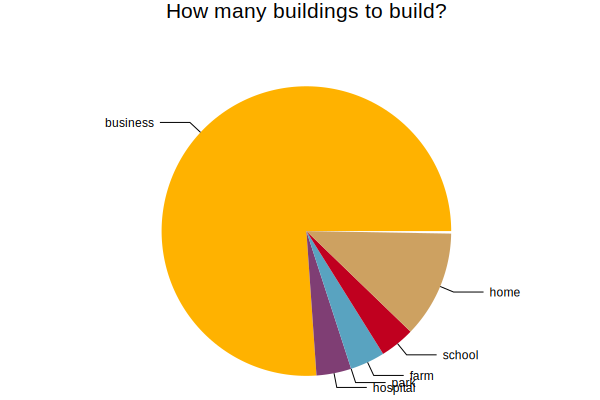

In [7]:
#=
    Result for Part 1
=#
population0 = 1     # Initial population of 3k people
budget0 = 100       # Base budget
num_build = findNumBuildings(population0, budget0, minBuildings,cost, profits, attractiveness)
println("Number of buildings to build: ")
for b = 1:size(num_build,1)
    println(buildings[b], " ", num_build[b])
end
PiePlot(buildings, num_build,"How many buildings to build?")

<div style="color:blue">Comments for Part 1:</div> 
- Here the unit of "home" represents a neighborhood of houses but not just 1 home.
- With the first step, it is quite simple to see that it favors a single, most useful building and minimize the use of all other buildings. This definitely to be expected, and surprisingly, it is not too far off from many real world towns being completely dependent on a specific industry. However, the way it is dependent is more so because of the fact that generic buildings like a businesses are generically good to have rather than a specific industry or building being good because the land has the resources/environment to provide these opportunities.
- It might be difficult to see it in the pie chart but using the data that we had, the best thing is to not build any park because the profit is not high enough and it is not "required" to build a park (in the min_building, park is assigned 0). We intentionally want to test how the program would react to data like this that are not required in the constraint. 

### 4.B What is the city like with zoning?

Academic license - for non-commercial use only
Optimal


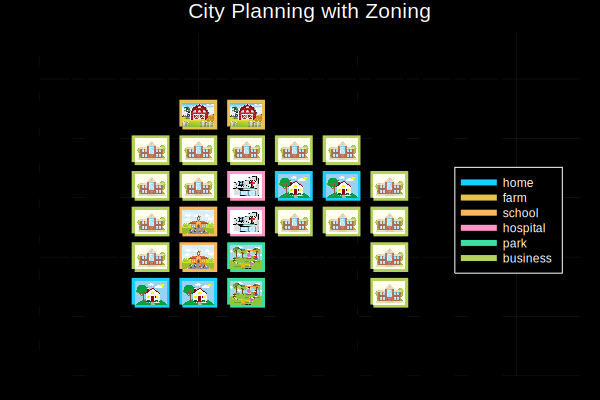

In [8]:
# result for part 2, calling part 2 function
layoutMapping("City Planning with Zoning")

<div style="color:blue">**Comments for Part 2:**</div>
In the second step, we can now visually see the layout of the city. Due to the constraint requiring like must be with like, buildings are often placed in pairs just to be able to have them on the map. This is why while having two schools or two hospitals next to each other makes no sense in real life, it happens here. However, this result also allows the semblance of districts or zones to come into play. Houses are in a discernible group of at least two as are businesses. Farms stay together in small but distinct areas. And while there are multiple districts of the same type, in real life, that happens as well! The placement of these districts, though, are rather arbitrary. To solve the main problems of this model, the fact that like is always with like and that districts are placed at seemingly random spots, we would have to make exceptions for buildings that don't always want to be together in the constraint, and we would have to either 1. limit how close two of the same districts are so that it makes more sense why there are two or more of the same district or 2. Limit it so that there can be at most one district of a specific type.

### 4.C What is the city like with zoning and year iterations?

#### 4.C.1. First Year Iterations

Academic license - for non-commercial use only


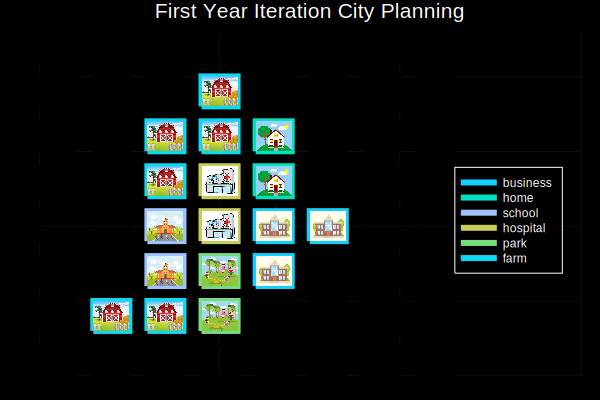

In [9]:
# result for part 3, calling part3 function
title = "First Year Iteration City Planning"
LayoutMappingAndYearIteration(1,title)

####  4.C.2 Second Year Iteration 

Academic license - for non-commercial use only


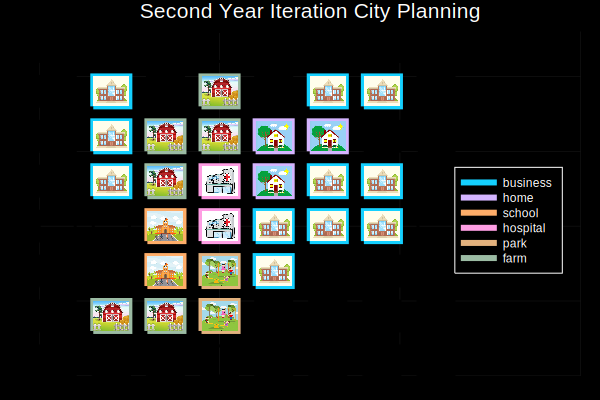

In [10]:
title = "Second Year Iteration City Planning"
fig = LayoutMappingAndYearIteration(2,title)

####  4.C.3 Third Year Iteration 

Academic license - for non-commercial use only


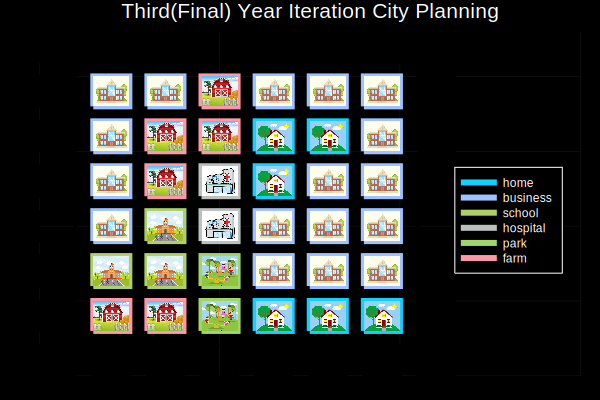

In [11]:
# third year iteration graph
title = "Third(Final) Year Iteration City Planning"
LayoutMappingAndYearIteration(3,title)

<div style="color:blue">Comments for part 3:</div>

- With step 3, it may seem like it is virtually the same as step 2, just over the course of x years. However, there is one key difference between each step besides that fact: step 3 isn't selfish. Consider if step 2 was a function called multiple times with a starting map, a starting budget, and a starting population based on the prior year. This would result in each year being maximized. However, it also changes the possible outcomes. Most importantly, it prevents opportunities from arising in future years as space quickly runs out for new, more expensive, more effective buildings to be made. For comparison's sake, here's step 2 ran like it is step 3 compared to step 3 itself:
- As you can see, with the iterative process in step 3, it is a much less "selfish" algorithm compared to step 2's algorithm ran over the course of multiple years. This makes sense as step 2's algorithm tries to maximize the next year's economic output and attractiveness. In other words, it looks more at the short term and asks itself, "What can I do now to get results immediately?" This can cause problems as this algorithm may put itself into a corner, stunting potential growth for future iterations. With step 3's algorithm, because it is trying to maximize the last year's output, it is much more careful with what it does.
- However, the numbers we use are relatively easy, and the structures we care about are extremely simplified and limited. Without more time or better software, scaling would be a huge problem. More structures means more variables to consider, and more years to take into account will take exponentially more time to compute the best solution. While many of these variables may be "loose" due to the light constraints we have on specific buildings, they still add to the complexity of the program.


## 5. Conclusion ##
The model we created is a start to a model of something better. As more variables and information gets added in, the more realistic and applicable it becomes. Right now, the model can do this for us:
- The model can give us an idea how a city should look to make it attractive
- The model can figure out what industries are most profitable or the best for the city
- The model can simulate development over the course of a few years to show how best to grow the city

However, there still exists some limitations:
- The model is very simplified. It does not take into consideration many real life scenarios. Ex: Should schools be next to each other?
- The model does not necessarily promote a healthy city should a single building be too prevalent
- The model is very sensitive to parameters. Small changes in requirements and profits/attractiveness can make it infeasible!
- The model can only handle a small set of data without drastically increasing its compute time

We use this model as a starting point. From here, there is an ocean of things that could be done (with more time) to considerably improve!


## 5.A. What's Next?

Having modeled a simplified version of city planning, we can see that these cities are not realistic. Part of this is the simplicity of the "buildings" we chose. If someone wanted to, it would not be difficult to add in significantly more buildings and a larger area then we did in this model. When adding more buildings it would also be benificial to split them into two groups. The first group would be treated like the majority of buildings in this model, meaning buildings that are often put together like farms and homes. The other group would be like the hospital, where it separated from others of the same type and within a certain distance to all other buildings. In this model we also made everything a single size, in real life this wouldn't happen so another improvement could be to add land area to each building. These would all be realitively simple things that would improve the model. There are many more complicated things that could be added to make it more realistic and some of those ideas are listed below: 
- Going into debt
- Dynamic tax rates for the budget
- Allowing for the deconstruction of buildings
- Expanding districts. 
- Make neighboring building's "relationship" matter more
  - ie. Make farms or mines want to be away from everything. Shops and restaraunts want to form a commercial district
- Population dependent attractiveness for buildings
  - As populations grow: 
    - Certain buildings become more attractive 
      - Offices, Appartments, Entertainment, Service Industry Structures
    - Other buildings become less attractive or want to be farther away from the population
      - Factories, Mines, Farms

This type of model, given some creative license, can also be applied to areas outside of city planning. A few examples could be:
- Park Design
 - Much like a city, a park can have certain structures that may be more or less attractive depending on who it's built for. The park can then choose its "topic(s)" that will serve as zones and build an ideal map based on this
- Interior Building Design
 - A building has certain utilities, and everything needs to not only be accessable but also be convient to access to. Additionally, some structures may improve the quality of life when using/occupying the building, so an ideal building design would want to balance the use of space with the functionality of it